In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/zomato.csv')

# Data preprocessing
# Drop unnecessary columns
df.drop(['url', 'phone', 'dish_liked', 'menu_item'], axis=1, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Convert 'rate' column to numeric
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)

# Drop rows with missing values in 'rate' column
df.dropna(subset=['rate'], inplace=True)

# Remove commas from 'approx_cost(for two people)' column and convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Scale numeric columns
scaler = MinMaxScaler()
df[['rate', 'approx_cost(for two people)', 'votes']] = scaler.fit_transform(df[['rate', 'approx_cost(for two people)', 'votes']])

# Fit KMeans clustering model
numeric_features = ['rate', 'approx_cost(for two people)', 'votes']
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(df[numeric_features])

# Example usage
restaurant_name = 'Jalsa'  # Replace with any other restaurant name
query_restaurant = df[df['name'] == restaurant_name][numeric_features]
cluster_label = kmeans_model.predict(query_restaurant)[0]

# Find restaurants in the same cluster
similar_restaurants = df[kmeans_model.labels_ == cluster_label]['name'].values

print(f"Restaurants similar to {restaurant_name} in cluster {cluster_label}:")
for i, restaurant in enumerate(similar_restaurants[:5]):
    print(f"{i + 1}: {restaurant}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Restaurants similar to Jalsa in cluster 8:
1: Jalsa
2: Spice Elephant
3: Smacznego
4: CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley
5: Cafe Shuffle


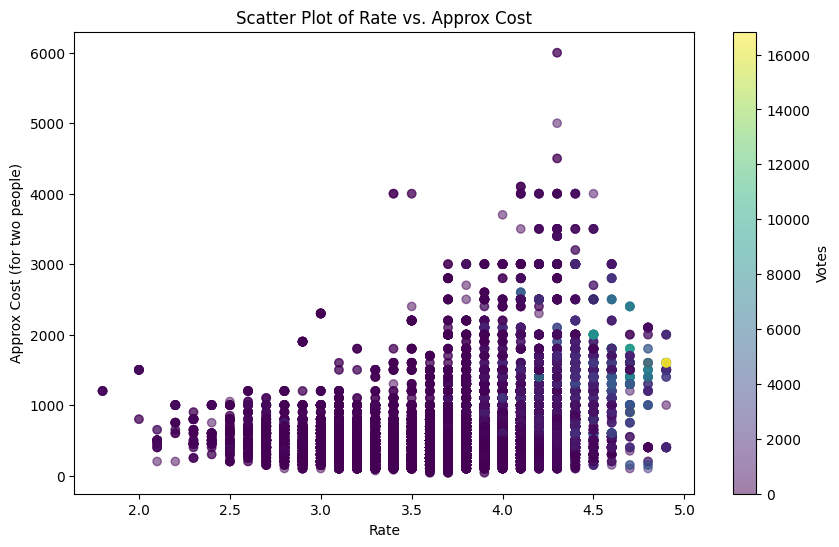

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/zomato.csv')

df.drop(['url', 'phone', 'dish_liked', 'menu_item'], axis=1, inplace=True)


df.drop_duplicates(inplace=True)


df.dropna(inplace=True)

df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) and '/' in x else None)

df.dropna(subset=['rate'], inplace=True)


df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)


plt.figure(figsize=(10, 6))
plt.scatter(df['rate'], df['approx_cost(for two people)'], c=df['votes'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Votes')
plt.xlabel('Rate')
plt.ylabel('Approx Cost (for two people)')
plt.title('Scatter Plot of Rate vs. Approx Cost')
plt.show()
